You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
x_l = np.load("/content/drive/MyDrive/SMAI2/X.npy") # image
y_l = np.load("/content/drive/MyDrive/SMAI2/Y.npy") # label

Mounted at /content/drive


**Data Visualization**

(-0.5, 63.5, 63.5, -0.5)

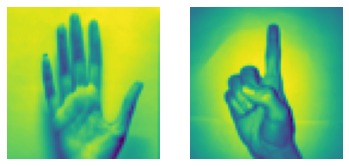

In [ ]:
import matplotlib.pyplot as plt
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[2061].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

**Converting x_l from 3D to 2D**

In [ ]:
#Converting x_l from 3D to 2D
numberOfImages = x_l.shape[0] 
print("X before", x_l.shape)
x_l = x_l.reshape(numberOfImages,x_l.shape[1]*x_l.shape[2])
print("X after", x_l.shape)

X before (2062, 64, 64)
X after (2062, 4096)


**Converting y_l from 2D to 1D**

In [ ]:
#Converting y_l from 2D to 1D 
print("Y before", y_l.shape)
numberOfImages = y_l.shape[0]
y1D_new = np.empty(numberOfImages)

for i in range(0, numberOfImages):
  number = 0
  for j in y_l[i]:
    if j == 1:
      y1D_new[i] = number
      break
    number += 1

 
print("Y after", y1D_new.shape) 

Y before (2062, 10)
Y after (2062,)


**Spliting data into train and test**

In [ ]:
# spliting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_l, y1D_new, test_size=0.30, random_state=49)

print(X_test.shape, X_train.shape, Y_test.shape, Y_train.shape)

(619, 4096) (1443, 4096) (619,) (1443,)


**Diagram of Sigmoid Function**

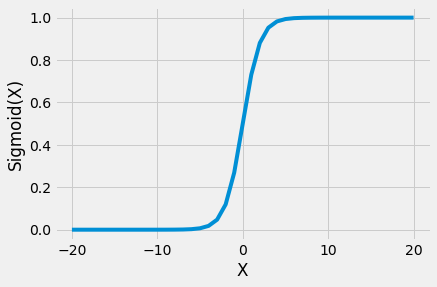

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.style as style

#Sigmoid Function
def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

x = np.arange(-20, 21) 
y = sigmoid(x) 

style.use("fivethirtyeight")
plt.plot(x, y)  

plt.ylabel("Sigmoid(X)") 
plt.xlabel("X")
plt.show()

# **1 vs All**

In [ ]:
D = {}
import numpy as np
def convert(i, Y):
  return [1 if val == i else 0 for val in Y]

for i in range(0,10):
  outputList1 = convert(i, Y_train)
  D[str(i)] = np.array(outputList1)

D

{'0': array([0, 0, 0, ..., 0, 0, 0]),
 '1': array([0, 1, 0, ..., 0, 0, 0]),
 '2': array([0, 0, 0, ..., 1, 0, 1]),
 '3': array([1, 0, 0, ..., 0, 0, 0]),
 '4': array([0, 0, 1, ..., 0, 0, 0]),
 '5': array([0, 0, 0, ..., 0, 0, 0]),
 '6': array([0, 0, 0, ..., 0, 0, 0]),
 '7': array([0, 0, 0, ..., 0, 0, 0]),
 '8': array([0, 0, 0, ..., 0, 1, 0]),
 '9': array([0, 0, 0, ..., 0, 0, 0])}

**1 vs All Classifier**

In [ ]:
#1 vs All classifier
import random
costs = list()
trainedparameters = list()

alpha = 0.01

def noOfData(X_t, pos):
  return X_t.shape[pos]

m = noOfData(X_train, 0)

#Sigmoid Function
def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

def calculateCost(Y, sig):
  #print(sig.shape)
  temp = Y*np.log(sig) + (1-Y)*np.log(1-sig)
  return 1/m*(-1*(np.sum(temp)))


def onevsall():
  outputNo = 0
  while outputNo <= 9:
    bias = 0.5
    X = X_train.T
    Y = D[str(outputNo)]
    #w = np.ones((1, 4096))
    w = np.zeros((1,noOfData(X_train, 1)))
    costfunctionval = list()
    print("Training Dataset ", outputNo)
    it = 0 
    while True:
      z = np.dot(w,X)+bias
      sig = sigmoid(z)
      j = calculateCost(Y, sig)
      #print(j) 
      costfunctionval.append(j)

      diff = sig-Y
      dw =  1/m * np.dot(diff,X.T)
      db =  1/m * np.sum(diff)

      w -= alpha*dw
      bias -= alpha*db
      if it!=0 and it > 3:
        if abs(j-costfunctionval[-2])<0.00001:
          if abs(j-costfunctionval[-3])<0.00001:
            break  
      it += 1       
    costs.append(costfunctionval)
    #print(costs)
    trainedparameters.append([w,bias])
    outputNo += 1

onevsall()

Training Dataset  0
Training Dataset  1
Training Dataset  2
Training Dataset  3
Training Dataset  4
Training Dataset  5
Training Dataset  6
Training Dataset  7
Training Dataset  8
Training Dataset  9


In [ ]:
import numpy as np

#Sigmoid Function
def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

def get_W_B(trainedparameters, outputNo):
  return trainedparameters[outputNo][0], trainedparameters[outputNo][1]

def isUpperClass(hypothesis, i, y):
  return np.logical_and(hypothesis >= 0.5,y.T[i] == 1)

def isLowerClass(hypothesis, i, y):
  return np.logical_and(hypothesis < 0.5,y.T[i] == 0)

def displayAccuracy(correct_predictions, totalSize, outputNo):
  Accuracy = (correct_predictions/totalSize)*100
  print(" % Accuracy for dataset", outputNo ," = ", Accuracy)

outputNo = 0
while outputNo <= 9:
  X = X_train.T
  Y = D[str(outputNo)]
  y = np.array(Y)
  weights, bias = get_W_B(trainedparameters, outputNo)
  correct_predictions = 0 
  for i in range(X_train.shape[0]):
    z = np.dot(weights,X.T[i,:]) + bias
    hypothesis = sigmoid(z)
    if isUpperClass(hypothesis, i, y):
        correct_predictions += 1
    if isLowerClass(hypothesis, i, y):
        correct_predictions += 1
  displayAccuracy(correct_predictions, X_train.shape[0], outputNo)               
  outputNo += 1

 % Accuracy for dataset 0  =  97.57449757449757
 % Accuracy for dataset 1  =  98.47539847539848
 % Accuracy for dataset 2  =  95.56479556479557
 % Accuracy for dataset 3  =  96.46569646569647
 % Accuracy for dataset 4  =  97.99029799029799
 % Accuracy for dataset 5  =  95.63409563409564
 % Accuracy for dataset 6  =  94.24809424809425
 % Accuracy for dataset 7  =  97.64379764379765
 % Accuracy for dataset 8  =  94.38669438669439
 % Accuracy for dataset 9  =  97.22799722799724


In [ ]:
accuratepredicts = 0
totalTestSize = X_test.shape[0]
y_Predicted = list()
def get_W_B(trainedparameters, outputNo):
  return trainedparameters[outputNo][0], trainedparameters[outputNo][1]

def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

probability = list()
for i in range(0, totalTestSize):
  for j in range(0, 10):
    w, b = get_W_B(trainedparameters, j)
    z = np.dot(X_test[i],w.T) + b
    sig = sigmoid(z)
    probability.append(sig)
  maxValue = max(probability)  
  predictMaxIndex = probability.index(maxValue)
  y_Predicted.append(predictMaxIndex)
  if Y_test.T[i] == predictMaxIndex:
    accuratepredicts = accuratepredicts+1
  probability = list()

print("No of accurate predictions =", accuratepredicts) 

No of accurate predictions = 471


In [ ]:
totalTestSize = X_test.shape[0]
accuracy = accuratepredicts/totalTestSize
print("Accuracy of test data is", accuracy*100, "%")

Accuracy of test data is 76.09046849757674 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_Predicted))

print("Classifiction Report")
print(classification_report(Y_test,y_Predicted))

Confusion Matrix
[[59  0  1  0  0  2  1  0  0  2]
 [ 1 54  0  0  0  2  3  0  0  0]
 [ 1  3 40  0  1  3  2  0  7  0]
 [ 0  5  3 44  0  4  4  1  2  0]
 [ 0  1  0  1 51  4  3  0  1  0]
 [ 5  1  0  2  2 40  0  0  2  1]
 [ 2  2 10  9  0  5 39  0  2  5]
 [ 1  0  5  0  0  1  0 51  3  2]
 [ 0  1 13  2  5  2  0  1 35  0]
 [ 1  0  0  0  1  3  1  0  0 58]]
Classifiction Report
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        65
         1.0       0.81      0.90      0.85        60
         2.0       0.56      0.70      0.62        57
         3.0       0.76      0.70      0.73        63
         4.0       0.85      0.84      0.84        61
         5.0       0.61      0.75      0.67        53
         6.0       0.74      0.53      0.61        74
         7.0       0.96      0.81      0.88        63
         8.0       0.67      0.59      0.63        59
         9.0       0.85      0.91      0.88        64

    accuracy                       

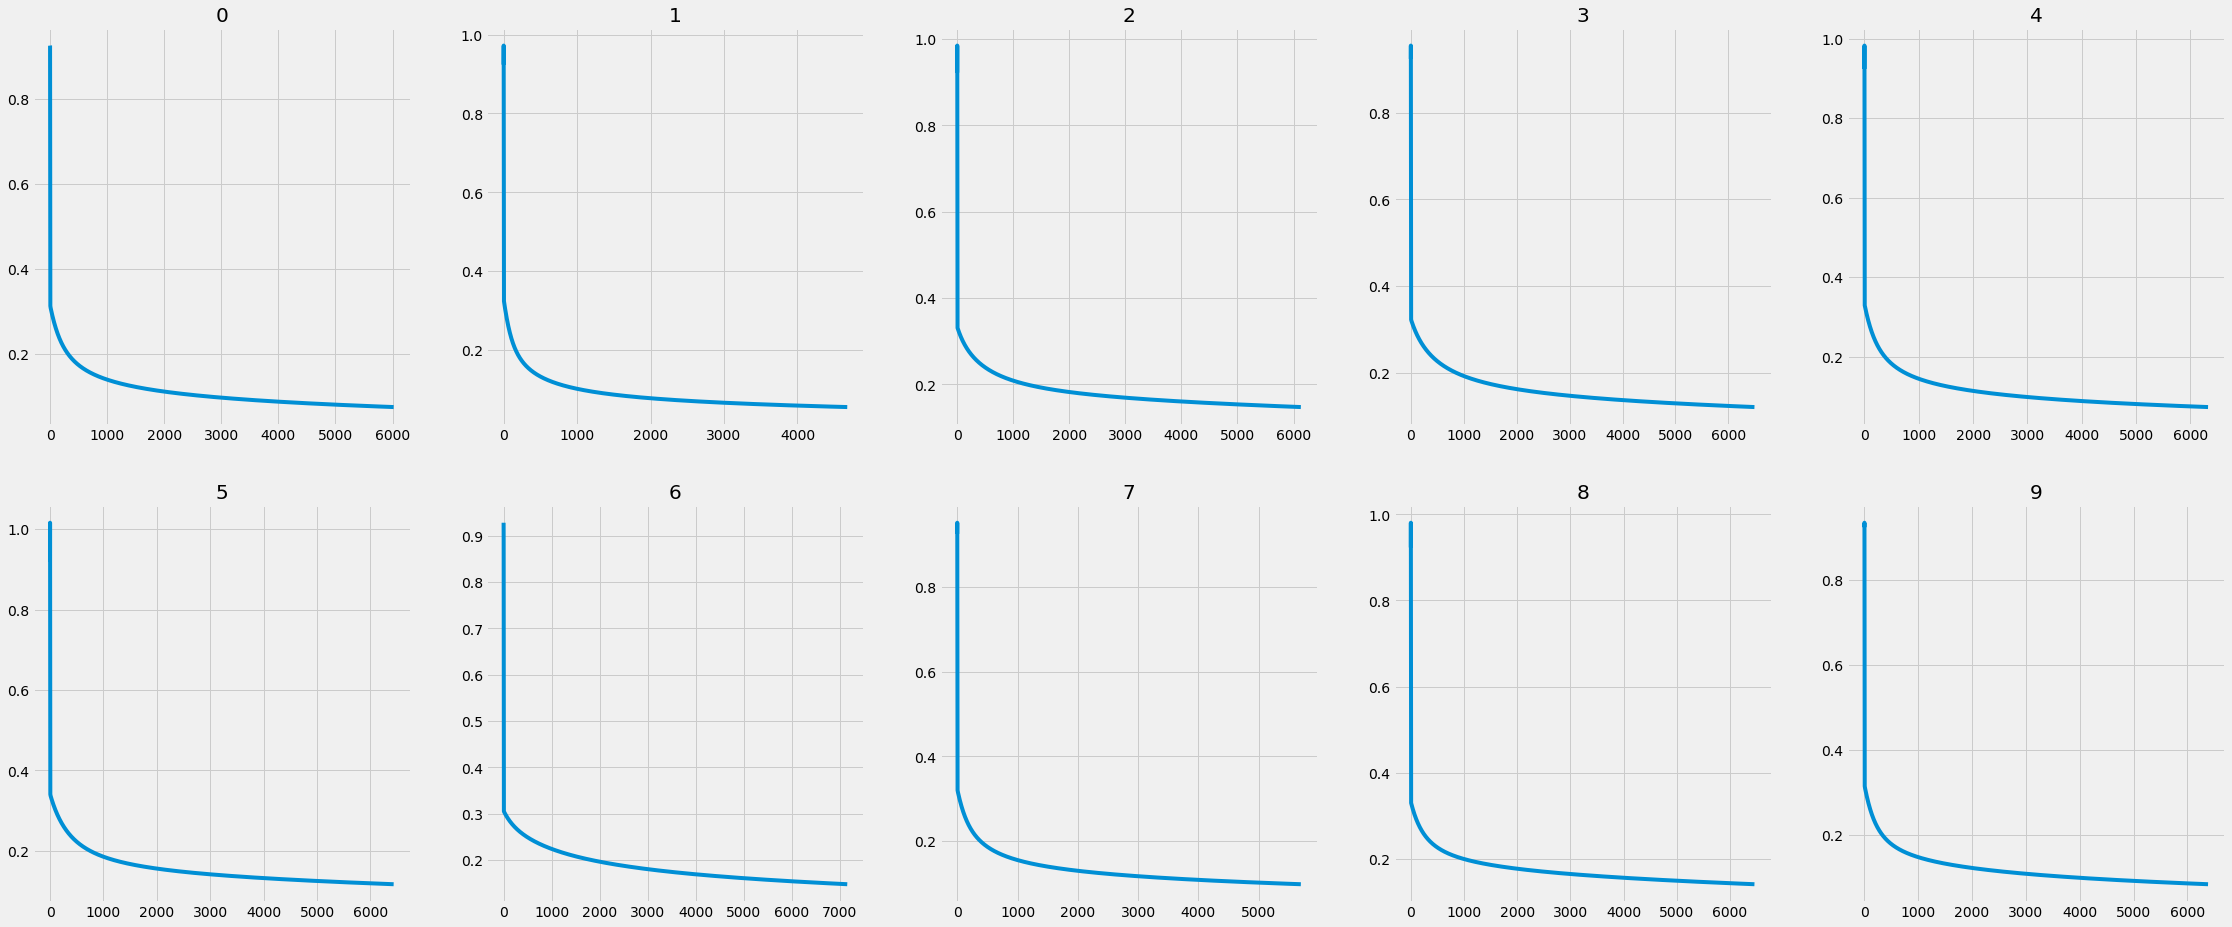

In [ ]:
import matplotlib.pyplot as plt
fig,img =  plt.subplots(2,5,figsize=(35,15))
count = 0
for i in range(0, 2):
  for j in range(0, 5):
    img[i][j].plot(costs[count])
    img[i][j].set_title(str(count))
    count += 1

plt.show()

# **1 vs 1 Classifier**

In [ ]:
D = {}
import numpy as np
def convert(i, Y):
  return [1 if val == i%10 else 0 for val in Y]

for i in range(0,45):
  outputList1 = convert(i, Y_train)
  D[str(i)] = np.array(outputList1)

D

{'0': array([0, 0, 0, ..., 0, 0, 0]),
 '1': array([0, 1, 0, ..., 0, 0, 0]),
 '10': array([0, 0, 0, ..., 0, 0, 0]),
 '11': array([0, 1, 0, ..., 0, 0, 0]),
 '12': array([0, 0, 0, ..., 1, 0, 1]),
 '13': array([1, 0, 0, ..., 0, 0, 0]),
 '14': array([0, 0, 1, ..., 0, 0, 0]),
 '15': array([0, 0, 0, ..., 0, 0, 0]),
 '16': array([0, 0, 0, ..., 0, 0, 0]),
 '17': array([0, 0, 0, ..., 0, 0, 0]),
 '18': array([0, 0, 0, ..., 0, 1, 0]),
 '19': array([0, 0, 0, ..., 0, 0, 0]),
 '2': array([0, 0, 0, ..., 1, 0, 1]),
 '20': array([0, 0, 0, ..., 0, 0, 0]),
 '21': array([0, 1, 0, ..., 0, 0, 0]),
 '22': array([0, 0, 0, ..., 1, 0, 1]),
 '23': array([1, 0, 0, ..., 0, 0, 0]),
 '24': array([0, 0, 1, ..., 0, 0, 0]),
 '25': array([0, 0, 0, ..., 0, 0, 0]),
 '26': array([0, 0, 0, ..., 0, 0, 0]),
 '27': array([0, 0, 0, ..., 0, 0, 0]),
 '28': array([0, 0, 0, ..., 0, 1, 0]),
 '29': array([0, 0, 0, ..., 0, 0, 0]),
 '3': array([1, 0, 0, ..., 0, 0, 0]),
 '30': array([0, 0, 0, ..., 0, 0, 0]),
 '31': array([0, 1, 0, ..., 0

In [ ]:
#1 vs 1 classifier
import random
costs = list()
trainedparameters = list()

alpha = 0.01

def noOfData(X_t, pos):
  return X_t.shape[pos]

m = noOfData(X_train, 0)

#Sigmoid Function
def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

def calculateCost(Y, sig):
  #print(sig.shape)
  temp = Y*np.log(sig) + (1-Y)*np.log(1-sig)
  return 1/m*(-1*(np.sum(temp)))


def onevsall():
  outputNo = 0
  while outputNo <= 44:
    bias = 0.5
    X = X_train.T
    Y = D[str(outputNo)]
    w = np.zeros((1,noOfData(X_train, 1)))
    costfunctionval = list()
    print("Training Dataset ", outputNo)
    it = 0 
    while True:
      z = np.dot(w,X)+bias
      sig = sigmoid(z)  #sigmoid
      j = calculateCost(Y, sig)
      #print(j) 
      costfunctionval.append(j)

      diff = sig-Y
      dw =  1/m * np.dot(diff,X.T)
      db =  1/m * np.sum(diff)

      w -= alpha*dw
      bias -= alpha*db
      if it!=0 and it > 3:
        if abs(j-costfunctionval[-2]) < 0.00001:
          if abs(j-costfunctionval[-3]) < 0.00001:
            break  
      it += 1       
    costs.append(costfunctionval)
    trainedparameters.append([w,bias])
    outputNo += 1

onevsall()

Training Dataset  0
Training Dataset  1
Training Dataset  2
Training Dataset  3
Training Dataset  4
Training Dataset  5
Training Dataset  6
Training Dataset  7
Training Dataset  8
Training Dataset  9
Training Dataset  10
Training Dataset  11
Training Dataset  12
Training Dataset  13
Training Dataset  14
Training Dataset  15
Training Dataset  16
Training Dataset  17
Training Dataset  18
Training Dataset  19
Training Dataset  20
Training Dataset  21
Training Dataset  22
Training Dataset  23
Training Dataset  24
Training Dataset  25
Training Dataset  26
Training Dataset  27
Training Dataset  28
Training Dataset  29
Training Dataset  30
Training Dataset  31
Training Dataset  32
Training Dataset  33
Training Dataset  34
Training Dataset  35
Training Dataset  36
Training Dataset  37
Training Dataset  38
Training Dataset  39
Training Dataset  40
Training Dataset  41
Training Dataset  42
Training Dataset  43
Training Dataset  44


In [ ]:
import numpy as np

#Sigmoid Function
def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

def get_W_B(trainedparameters, outputNo):
  return trainedparameters[outputNo][0], trainedparameters[outputNo][1]

def isUpperClass(hypothesis, i, y):
  return np.logical_and(hypothesis >= 0.5,y.T[i] == 1)

def isLowerClass(hypothesis, i, y):
  return np.logical_and(hypothesis < 0.5,y.T[i] == 0)

def displayAccuracy(correct_predictions, totalSize, outputNo):
  Accuracy = (correct_predictions/totalSize)*100
  print(" % Accuracy for dataset", outputNo ," = ", Accuracy)

outputNo = 0
while outputNo <= 44:
  X = X_train.T
  Y = D[str(outputNo)]
  y = np.array(Y)
  weights, bias = get_W_B(trainedparameters, outputNo)
  correct_predictions = 0 
  for i in range(X_train.shape[0]):
    z = np.dot(weights,X.T[i,:]) + bias
    hypothesis = sigmoid(z)
    if isUpperClass(hypothesis, i, y):
        correct_predictions += 1
    if isLowerClass(hypothesis, i, y):
        correct_predictions += 1
  displayAccuracy(correct_predictions, X_train.shape[0], outputNo)               
  outputNo += 1

 % Accuracy for dataset 0  =  97.57449757449757
 % Accuracy for dataset 1  =  98.47539847539848
 % Accuracy for dataset 2  =  95.56479556479557
 % Accuracy for dataset 3  =  96.46569646569647
 % Accuracy for dataset 4  =  97.99029799029799
 % Accuracy for dataset 5  =  95.63409563409564
 % Accuracy for dataset 6  =  94.24809424809425
 % Accuracy for dataset 7  =  97.64379764379765
 % Accuracy for dataset 8  =  94.38669438669439
 % Accuracy for dataset 9  =  97.22799722799724
 % Accuracy for dataset 10  =  97.57449757449757
 % Accuracy for dataset 11  =  98.47539847539848
 % Accuracy for dataset 12  =  95.56479556479557
 % Accuracy for dataset 13  =  96.46569646569647
 % Accuracy for dataset 14  =  97.99029799029799
 % Accuracy for dataset 15  =  95.63409563409564
 % Accuracy for dataset 16  =  94.24809424809425
 % Accuracy for dataset 17  =  97.64379764379765
 % Accuracy for dataset 18  =  94.38669438669439
 % Accuracy for dataset 19  =  97.22799722799724
 % Accuracy for dataset 20  = 

In [ ]:
accuratepredicts = 0
totalTestSize = X_test.shape[0]
y_Predicted = list()

def get_W_B(trainedparameters, outputNo):
  return trainedparameters[outputNo][0], trainedparameters[outputNo][1]

def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z

probability = list()
for i in range(0, totalTestSize):
  for j in range(0, 45):
    w, b = get_W_B(trainedparameters, j)
    z = np.dot(X_test[i],w.T) + b
    sig = sigmoid(z)
    probability.append(sig)
  maxValue = max(probability)  
  predictMaxIndex = probability.index(maxValue)
  y_Predicted.append(predictMaxIndex)
  if Y_test.T[i] == predictMaxIndex:
    accuratepredicts = accuratepredicts+1
  probability = list()

print("No of accurate predictions =", accuratepredicts)    

No of accurate predictions = 471


In [ ]:
totalTestSize = X_test.shape[0]
accuracy = accuratepredicts/totalTestSize
print("Accuracy of test data is", accuracy*100, "%")

Accuracy of test data is 76.09046849757674 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_Predicted))
print("Classifiction Report")
print(classification_report(Y_test,y_Predicted))

Confusion Matrix
[[59  0  1  0  0  2  1  0  0  2]
 [ 1 54  0  0  0  2  3  0  0  0]
 [ 1  3 40  0  1  3  2  0  7  0]
 [ 0  5  3 44  0  4  4  1  2  0]
 [ 0  1  0  1 51  4  3  0  1  0]
 [ 5  1  0  2  2 40  0  0  2  1]
 [ 2  2 10  9  0  5 39  0  2  5]
 [ 1  0  5  0  0  1  0 51  3  2]
 [ 0  1 13  2  5  2  0  1 35  0]
 [ 1  0  0  0  1  3  1  0  0 58]]
Classifiction Report
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        65
         1.0       0.81      0.90      0.85        60
         2.0       0.56      0.70      0.62        57
         3.0       0.76      0.70      0.73        63
         4.0       0.85      0.84      0.84        61
         5.0       0.61      0.75      0.67        53
         6.0       0.74      0.53      0.61        74
         7.0       0.96      0.81      0.88        63
         8.0       0.67      0.59      0.63        59
         9.0       0.85      0.91      0.88        64

    accuracy                       

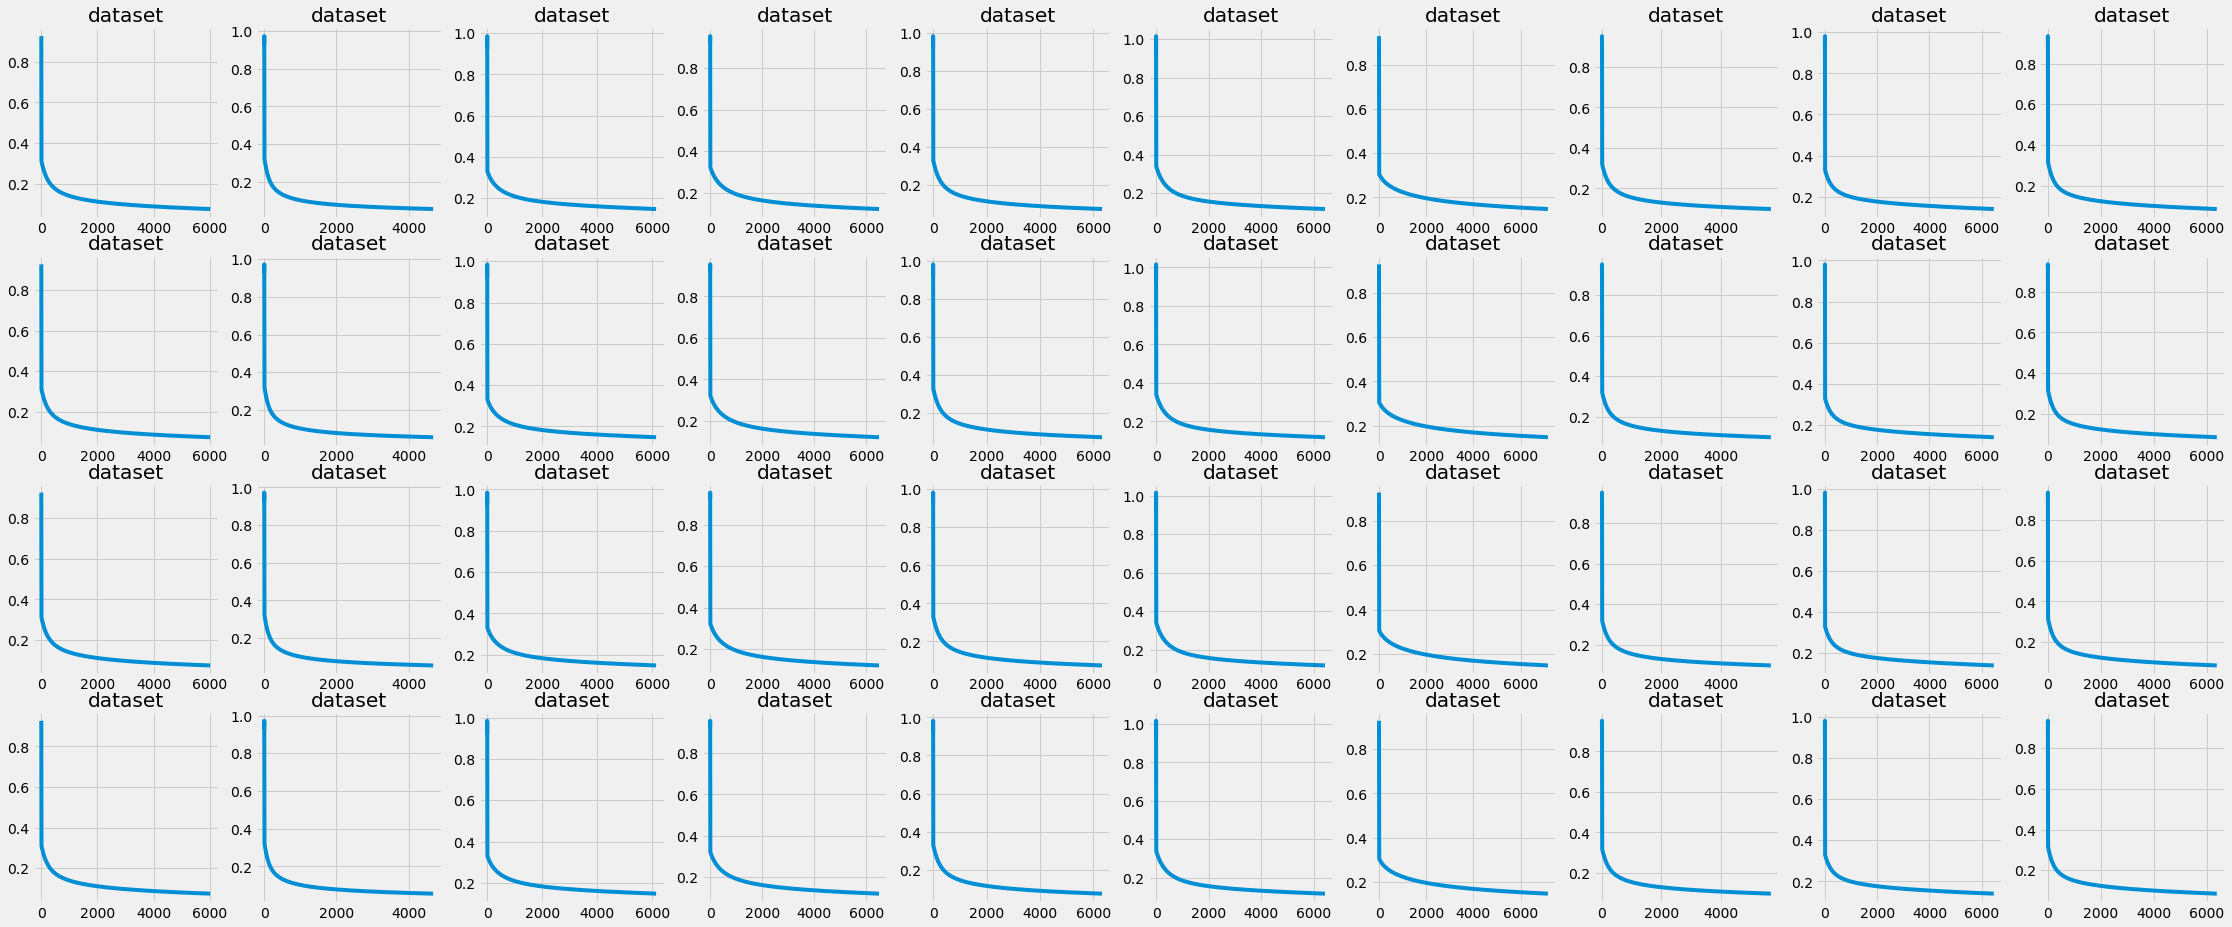

In [ ]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(4,10,figsize=(35,15))
count = 0
for i in range(0,4):
  for j in range(0,10):
    a[i][j].plot(costs[count])
    a[i][j].set_title("dataset")
    count += 1
    
plt.show()

# **Log Reg from scikit learn**

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr')
logisticRegr.fit(X_train, Y_train)
 
#for the entire dataset
y_Predicted = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test) 

In [ ]:
print(score*100)

74.47495961227787


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_Predicted))
print("Classifiction Report")
print(classification_report(Y_test,y_Predicted))

Confusion Matrix
[[57  0  0  1  0  2  2  0  0  3]
 [ 0 53  0  0  0  2  5  0  0  0]
 [ 0  3 37  0  2  4  3  0  8  0]
 [ 0  4  4 39  0  3  6  0  7  0]
 [ 0  1  1  1 51  4  2  0  1  0]
 [ 4  1  2  2  2 39  0  0  2  1]
 [ 4  1  9  8  0  4 43  0  1  4]
 [ 0  0  5  0  0  1  0 50  5  2]
 [ 0  0 11  5  4  3  0  3 33  0]
 [ 0  0  1  0  0  2  1  1  0 59]]
Classifiction Report
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        65
         1.0       0.84      0.88      0.86        60
         2.0       0.53      0.65      0.58        57
         3.0       0.70      0.62      0.66        63
         4.0       0.86      0.84      0.85        61
         5.0       0.61      0.74      0.67        53
         6.0       0.69      0.58      0.63        74
         7.0       0.93      0.79      0.85        63
         8.0       0.58      0.56      0.57        59
         9.0       0.86      0.92      0.89        64

    accuracy                       

# **Accuracy Comparison**

> **Accuracy with One vs One - 76.09%**

> **Accuracy with One vs All - 76%**

> **Accuracy with Sckit Learn - 74.47%**